<a href="https://colab.research.google.com/github/krishnatejak2/EVA4/blob/master/Session%206/EVA4_S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team :
krishnateja.k2@gmail.com
amar.r.naik@gmail.com
shankar.uday007@gmail.com
prasad.shripathi@gmail.com

# Import Libraries

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
# from receptivefield.pytorch import PytorchReceptiveField
# from receptivefield.image import get_default_image
# from torch_receptive_field import receptive_field

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

In [0]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-5.0, 5.0), fill=(1,)), 
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)), # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                      #  transforms.RandomErasing()
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=64, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

938
157
torch.Size([64, 1, 28, 28])
torch.Size([64])


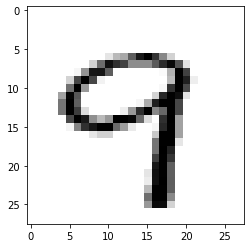

In [5]:
# # We'd need to convert it into Numpy! Remember above we have converted it into tensors already
# train_data = train.train_data
# train_data = train.transform(train_data.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(sum(1 for _ in train_loader))
print(sum(1 for _ in test_loader))
print(images.shape)
print(labels.shape)

# # Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

In [0]:
# figure = plt.figure()
# num_of_images = 60
# for index in range(1, num_of_images + 1):
#     plt.subplot(6, 10, index)
#     plt.axis('off')
#     plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [7]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1305)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# The model
Let's start with the model we first saw

In [0]:
dropout_value = 0.1
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
         # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU(),
        ) # output_size = 26, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.Dropout(dropout_value),
            nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) # output_size = 24, RF = 5

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) 
        # output_size = 11, RF = 6
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 12, RF = 6

        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=12, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(12),
            nn.Dropout(dropout_value),
            nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) # output_size = 10, RF = 10

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value),
            nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) # output_size = 10, RF = 14
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1,bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value),
            nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) # output_size = 10, RF = 16

        # OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) # output_size = 10, RF = 18
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=3)
        ) # output_size = 10, RF = 22

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # output_size = 1, RF = 34


    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [9]:
!pip install torchsummary

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
           Dropout-3           [-1, 10, 26, 26]               0
              ReLU-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 20, 24, 24]           1,800
       BatchNorm2d-6           [-1, 20, 24, 24]              40
           Dropout-7           [-1, 20, 24, 24]               0
              ReLU-8           [-1, 20, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             200
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 12, 10, 10]           1,080
      BatchNorm2d-12           [-1, 12, 10, 10]              24
          Dropout-13           [-1, 12, 10, 10]               0
             ReLU-14           [-1

In [10]:
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

convblock1.0.weight 	 torch.Size([10, 1, 3, 3])
convblock1.1.weight 	 torch.Size([10])
convblock1.1.bias 	 torch.Size([10])
convblock1.1.running_mean 	 torch.Size([10])
convblock1.1.running_var 	 torch.Size([10])
convblock1.1.num_batches_tracked 	 torch.Size([])
convblock2.0.weight 	 torch.Size([20, 10, 3, 3])
convblock2.1.weight 	 torch.Size([20])
convblock2.1.bias 	 torch.Size([20])
convblock2.1.running_mean 	 torch.Size([20])
convblock2.1.running_var 	 torch.Size([20])
convblock2.1.num_batches_tracked 	 torch.Size([])
convblock3.0.weight 	 torch.Size([10, 20, 1, 1])
convblock4.0.weight 	 torch.Size([12, 10, 3, 3])
convblock4.1.weight 	 torch.Size([12])
convblock4.1.bias 	 torch.Size([12])
convblock4.1.running_mean 	 torch.Size([12])
convblock4.1.running_var 	 torch.Size([12])
convblock4.1.num_batches_tracked 	 torch.Size([])
convblock5.0.weight 	 torch.Size([16, 12, 3, 3])
convblock5.1.weight 	 torch.Size([16])
convblock5.1.bias 	 torch.Size([16])
convblock5.1.running_mean 	 torch.S

In [11]:
l = [module for module in model.modules() if type(module) != nn.Sequential]
print(l[1])

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)


# Training and Testing

All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments. 

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

train_losses_l1 = []
test_losses_l1 = []
train_acc_l1 = []
test_acc_l1 = []

train_losses_l2 = []
test_losses_l2 = []
train_acc_l2 = []
test_acc_l2 = []

train_losses_l1_l2 = []
test_losses_l1_l2 = []
train_acc_l1_l2 = []
test_acc_l1_l2 = []

def train(model, device, train_loader, optimizer, epoch, loss_type):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  count = 0
  if epoch >=39:
    figure = plt.figure(figsize=(15,10))
    figure.suptitle('Training Data : Misclassification', fontsize=16)
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)

    if loss_type == 'Normal':
      train_losses.append(loss)
    elif loss_type == 'L1':
      # l1_crit =  nn.L1Loss(size_average=False,reduction='sum')
      reg_loss = 0
      for param in model.parameters():
        reg_loss += torch.sum(abs(param))
      factor = 0.0005
      loss += factor * reg_loss 
      train_losses_l1.append(loss)
    elif loss_type == 'L2':
      train_losses_l2.append(loss) 
    elif loss_type == 'ElastiNet':
      # l1_crit = nn.L1Loss(size_average=False,reduction='sum')
      reg_loss = 0
      for param in model.parameters():
        reg_loss += torch.sum(abs(param)) #l1_crit(param).item()
      factor = 0.0005
      loss += factor * reg_loss 
      train_losses_l1_l2.append(loss) 

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device)
    
    for index,image in enumerate(data):      
        if x[index] == 1 and count < 25 and epoch>=39:
          plt.subplot(5, 5, count+1)
          plt.axis('off')
          plt.title("Classified as : "+ str(pred[index].item()))
          plt.imshow(data[index].cpu().numpy().squeeze(), cmap='gray_r')
          count = count+1        

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

    if loss_type == 'Normal':
      train_acc.append(100*correct/processed)
    elif loss_type == 'L1':
      train_acc_l1.append(100*correct/processed)
    elif loss_type == 'L2':
      train_acc_l2.append(100*correct/processed)
    elif loss_type == 'ElastiNet':
      train_acc_l1_l2.append(100*correct/processed)

def test(model, device, test_loader,loss_type):
    model.eval()
    test_loss = 0
    correct = 0
    count = 0
    if epoch >=39:
      figure = plt.figure(figsize=(15,10))
      figure.suptitle('Test Data : Misclassification', fontsize=16)

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device)
    
            for index,image in enumerate(data):      
                if x[index] == 1 and count < 25 and epoch>=39:
                  plt.subplot(5, 5, count+1)
                  plt.axis('off')
                  plt.title("Classified as : "+ str(pred[index].item()))
                  plt.imshow(data[index].cpu().numpy().squeeze(), cmap='gray_r')
                  count = count+1   

    test_loss /= len(test_loader.dataset)

    if loss_type == 'Normal':
      test_losses.append(test_loss)
    elif loss_type == 'L1':
      test_losses_l1.append(test_loss)
    elif loss_type == 'L2':
      test_losses_l2.append(test_loss)
    elif loss_type == 'ElastiNet':
      test_losses_l1_l2.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    if loss_type == 'Normal':
      test_acc.append(100. * correct / len(test_loader.dataset))
    elif loss_type == 'L1':
      test_acc_l1.append(100. * correct / len(test_loader.dataset))
    elif loss_type == 'L2':
      test_acc_l2.append(100. * correct / len(test_loader.dataset))
    elif loss_type == 'ElastiNet':
      test_acc_l1_l2.append(100. * correct / len(test_loader.dataset))

    

# Let's Train and test our model

  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
Loss=0.008410722017288208 Batch_id=937 Accuracy=93.25: 100%|██████████| 938/938 [00:22<00:00, 42.13it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0620, Accuracy: 9813/10000 (98.13%)

EPOCH: 1


Loss=0.14678117632865906 Batch_id=937 Accuracy=97.93: 100%|██████████| 938/938 [00:21<00:00, 49.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9866/10000 (98.66%)

EPOCH: 2


Loss=0.09570783376693726 Batch_id=937 Accuracy=98.27: 100%|██████████| 938/938 [00:21<00:00, 43.47it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9866/10000 (98.66%)

EPOCH: 3


Loss=0.02891196310520172 Batch_id=937 Accuracy=98.47: 100%|██████████| 938/938 [00:21<00:00, 43.46it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0306, Accuracy: 9900/10000 (99.00%)

EPOCH: 4


Loss=0.006205037236213684 Batch_id=937 Accuracy=98.52: 100%|██████████| 938/938 [00:21<00:00, 53.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 9879/10000 (98.79%)

EPOCH: 5


Loss=0.05540667474269867 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [00:20<00:00, 45.39it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0343, Accuracy: 9890/10000 (98.90%)

EPOCH: 6


Loss=0.005853325128555298 Batch_id=937 Accuracy=98.76: 100%|██████████| 938/938 [00:20<00:00, 45.28it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0294, Accuracy: 9906/10000 (99.06%)

EPOCH: 7


Loss=0.2213740199804306 Batch_id=937 Accuracy=98.89: 100%|██████████| 938/938 [00:21<00:00, 44.55it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9902/10000 (99.02%)

EPOCH: 8


Loss=0.022380560636520386 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:20<00:00, 44.76it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9918/10000 (99.18%)

EPOCH: 9


Loss=0.000957489013671875 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:21<00:00, 44.61it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9925/10000 (99.25%)

EPOCH: 10


Loss=0.022375136613845825 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [00:20<00:00, 53.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 9916/10000 (99.16%)

EPOCH: 11


Loss=0.007648661732673645 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:20<00:00, 45.72it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0239, Accuracy: 9920/10000 (99.20%)

EPOCH: 12


Loss=0.08259697258472443 Batch_id=937 Accuracy=99.01: 100%|██████████| 938/938 [00:20<00:00, 44.83it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9913/10000 (99.13%)

EPOCH: 13


Loss=0.023144766688346863 Batch_id=937 Accuracy=99.05: 100%|██████████| 938/938 [00:20<00:00, 45.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9911/10000 (99.11%)

EPOCH: 14


Loss=0.0482013076543808 Batch_id=937 Accuracy=99.05: 100%|██████████| 938/938 [00:20<00:00, 45.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9910/10000 (99.10%)

EPOCH: 15


Loss=0.009559810161590576 Batch_id=937 Accuracy=99.06: 100%|██████████| 938/938 [00:21<00:00, 44.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9925/10000 (99.25%)

EPOCH: 16


Loss=0.0011182725429534912 Batch_id=937 Accuracy=99.09: 100%|██████████| 938/938 [00:20<00:00, 51.87it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9924/10000 (99.24%)

EPOCH: 17


Loss=0.0007742047309875488 Batch_id=937 Accuracy=99.15: 100%|██████████| 938/938 [00:21<00:00, 43.91it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9928/10000 (99.28%)

EPOCH: 18


Loss=0.070354163646698 Batch_id=937 Accuracy=99.15: 100%|██████████| 938/938 [00:20<00:00, 45.05it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9934/10000 (99.34%)

EPOCH: 19


Loss=0.0003535747528076172 Batch_id=937 Accuracy=99.12: 100%|██████████| 938/938 [00:20<00:00, 45.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9930/10000 (99.30%)

EPOCH: 20


Loss=0.023161932826042175 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [00:20<00:00, 45.20it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9926/10000 (99.26%)

EPOCH: 21


Loss=0.004712611436843872 Batch_id=937 Accuracy=99.19: 100%|██████████| 938/938 [00:20<00:00, 45.85it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9924/10000 (99.24%)

EPOCH: 22


Loss=0.0019686222076416016 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:20<00:00, 46.31it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9934/10000 (99.34%)

EPOCH: 23


Loss=0.0004915595054626465 Batch_id=937 Accuracy=99.19: 100%|██████████| 938/938 [00:20<00:00, 54.85it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9930/10000 (99.30%)

EPOCH: 24


Loss=0.05769196152687073 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:19<00:00, 47.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 9915/10000 (99.15%)

EPOCH: 25


Loss=0.0015766769647598267 Batch_id=937 Accuracy=99.23: 100%|██████████| 938/938 [00:20<00:00, 46.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 9921/10000 (99.21%)

EPOCH: 26


Loss=0.002928793430328369 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:20<00:00, 46.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9936/10000 (99.36%)

EPOCH: 27


Loss=0.007055297493934631 Batch_id=937 Accuracy=99.32: 100%|██████████| 938/938 [00:20<00:00, 46.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9920/10000 (99.20%)

EPOCH: 28


Loss=0.001802682876586914 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:20<00:00, 46.17it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9930/10000 (99.30%)

EPOCH: 29


Loss=0.0038575828075408936 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:19<00:00, 47.15it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9928/10000 (99.28%)

EPOCH: 30


Loss=0.032800883054733276 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:19<00:00, 47.68it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9928/10000 (99.28%)

EPOCH: 31


Loss=0.0002129077911376953 Batch_id=937 Accuracy=99.29: 100%|██████████| 938/938 [00:19<00:00, 53.41it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9939/10000 (99.39%)

EPOCH: 32


Loss=0.06048709154129028 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:19<00:00, 47.66it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9927/10000 (99.27%)

EPOCH: 33


Loss=0.0003758072853088379 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:20<00:00, 46.50it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9932/10000 (99.32%)

EPOCH: 34


Loss=0.027608290314674377 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:19<00:00, 48.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9950/10000 (99.50%)

EPOCH: 35


Loss=0.17504248023033142 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:19<00:00, 47.46it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9936/10000 (99.36%)

EPOCH: 36


Loss=0.018552690744400024 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:19<00:00, 47.52it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 9942/10000 (99.42%)

EPOCH: 37


Loss=0.0004545152187347412 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:19<00:00, 48.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9941/10000 (99.41%)

EPOCH: 38


Loss=0.030942589044570923 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:19<00:00, 47.80it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9933/10000 (99.33%)

EPOCH: 39


Loss=0.0029387474060058594 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:20<00:00, 56.94it/s]



Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)



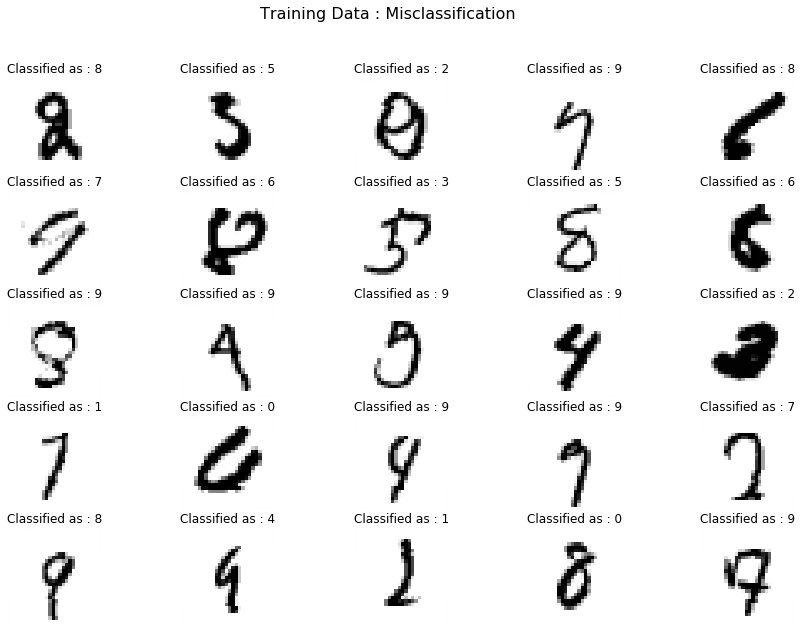

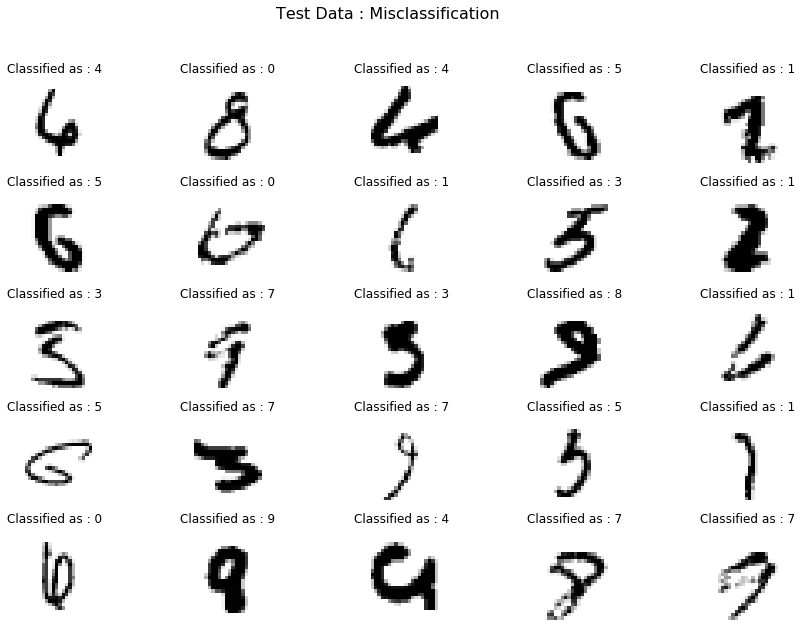

In [13]:
from torch.optim.lr_scheduler import StepLR
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,)
# scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch,'Normal')
    # scheduler.step()
    test(model, device, test_loader,'Normal')

Text(0.5, 1.0, 'Test Accuracy')

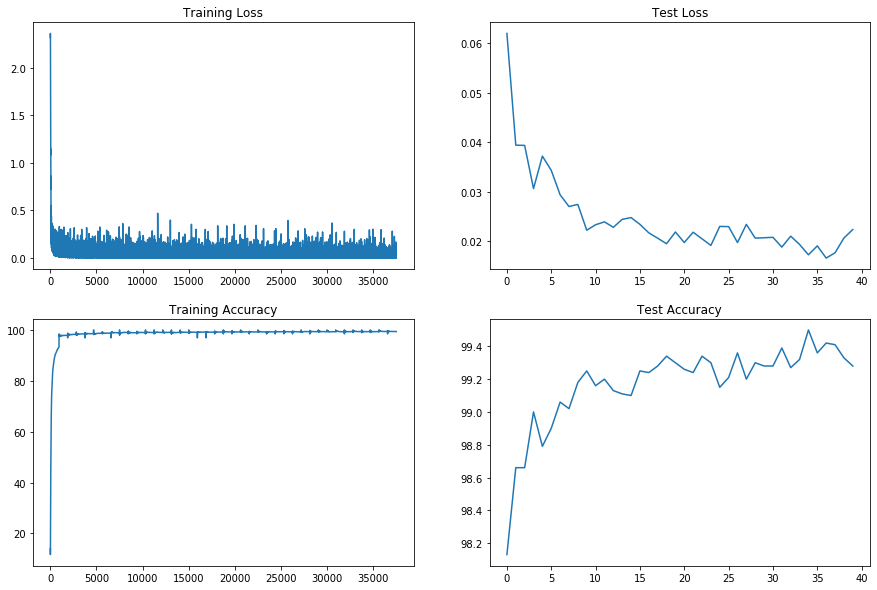

In [14]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
Loss=0.6920046210289001 Batch_id=937 Accuracy=93.10: 100%|██████████| 938/938 [00:22<00:00, 42.47it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0693, Accuracy: 9777/10000 (97.77%)

EPOCH: 1


Loss=0.2269977480173111 Batch_id=937 Accuracy=97.38: 100%|██████████| 938/938 [00:21<00:00, 43.23it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0699, Accuracy: 9796/10000 (97.96%)

EPOCH: 2


Loss=0.27486687898635864 Batch_id=937 Accuracy=97.56: 100%|██████████| 938/938 [00:21<00:00, 43.38it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0810, Accuracy: 9748/10000 (97.48%)

EPOCH: 3


Loss=0.220106303691864 Batch_id=937 Accuracy=97.67: 100%|██████████| 938/938 [00:21<00:00, 44.04it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0601, Accuracy: 9807/10000 (98.07%)

EPOCH: 4


Loss=0.2024836242198944 Batch_id=937 Accuracy=97.88: 100%|██████████| 938/938 [00:21<00:00, 43.40it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0499, Accuracy: 9846/10000 (98.46%)

EPOCH: 5


Loss=0.22440867125988007 Batch_id=937 Accuracy=97.88: 100%|██████████| 938/938 [00:21<00:00, 44.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0467, Accuracy: 9862/10000 (98.62%)

EPOCH: 6


Loss=0.1824907809495926 Batch_id=937 Accuracy=97.91: 100%|██████████| 938/938 [00:21<00:00, 42.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0498, Accuracy: 9855/10000 (98.55%)

EPOCH: 7


Loss=0.20859718322753906 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:21<00:00, 43.31it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0392, Accuracy: 9866/10000 (98.66%)

EPOCH: 8


Loss=0.14418162405490875 Batch_id=937 Accuracy=98.00: 100%|██████████| 938/938 [00:21<00:00, 43.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0335, Accuracy: 9903/10000 (99.03%)

EPOCH: 9


Loss=0.3453502655029297 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:21<00:00, 43.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0509, Accuracy: 9844/10000 (98.44%)

EPOCH: 10


Loss=0.14314386248588562 Batch_id=937 Accuracy=97.99: 100%|██████████| 938/938 [00:21<00:00, 44.28it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0474, Accuracy: 9844/10000 (98.44%)

EPOCH: 11


Loss=0.2840462625026703 Batch_id=937 Accuracy=97.90: 100%|██████████| 938/938 [00:21<00:00, 42.89it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0481, Accuracy: 9839/10000 (98.39%)

EPOCH: 12


Loss=0.20279616117477417 Batch_id=937 Accuracy=98.00: 100%|██████████| 938/938 [00:21<00:00, 43.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0423, Accuracy: 9880/10000 (98.80%)

EPOCH: 13


Loss=0.15792901813983917 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [00:21<00:00, 43.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0441, Accuracy: 9866/10000 (98.66%)

EPOCH: 14


Loss=0.15887214243412018 Batch_id=937 Accuracy=98.06: 100%|██████████| 938/938 [00:21<00:00, 43.00it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0364, Accuracy: 9895/10000 (98.95%)

EPOCH: 15


Loss=0.13916420936584473 Batch_id=937 Accuracy=98.11: 100%|██████████| 938/938 [00:21<00:00, 50.88it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0518, Accuracy: 9837/10000 (98.37%)

EPOCH: 16


Loss=0.15234296023845673 Batch_id=937 Accuracy=98.11: 100%|██████████| 938/938 [00:22<00:00, 42.48it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0770, Accuracy: 9730/10000 (97.30%)

EPOCH: 17


Loss=0.25211769342422485 Batch_id=937 Accuracy=98.01: 100%|██████████| 938/938 [00:21<00:00, 43.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0597, Accuracy: 9812/10000 (98.12%)

EPOCH: 18


Loss=0.1709538996219635 Batch_id=937 Accuracy=98.03: 100%|██████████| 938/938 [00:22<00:00, 42.48it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0740, Accuracy: 9747/10000 (97.47%)

EPOCH: 19


Loss=0.1470983326435089 Batch_id=937 Accuracy=98.05: 100%|██████████| 938/938 [00:22<00:00, 41.61it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0400, Accuracy: 9874/10000 (98.74%)

EPOCH: 20


Loss=0.19428640604019165 Batch_id=937 Accuracy=98.09: 100%|██████████| 938/938 [00:21<00:00, 43.97it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0676, Accuracy: 9781/10000 (97.81%)

EPOCH: 21


Loss=0.173764169216156 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [00:21<00:00, 43.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0507, Accuracy: 9842/10000 (98.42%)

EPOCH: 22


Loss=0.21734711527824402 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:22<00:00, 42.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0431, Accuracy: 9867/10000 (98.67%)

EPOCH: 23


Loss=0.1751691699028015 Batch_id=937 Accuracy=98.06: 100%|██████████| 938/938 [00:21<00:00, 43.41it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0517, Accuracy: 9875/10000 (98.75%)

EPOCH: 24


Loss=0.14163193106651306 Batch_id=937 Accuracy=98.11: 100%|██████████| 938/938 [00:21<00:00, 42.67it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0462, Accuracy: 9848/10000 (98.48%)

EPOCH: 25


Loss=0.13516589999198914 Batch_id=937 Accuracy=98.03: 100%|██████████| 938/938 [00:21<00:00, 43.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0635, Accuracy: 9796/10000 (97.96%)

EPOCH: 26


Loss=0.33409997820854187 Batch_id=937 Accuracy=98.04: 100%|██████████| 938/938 [00:22<00:00, 42.43it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0544, Accuracy: 9832/10000 (98.32%)

EPOCH: 27


Loss=0.13369926810264587 Batch_id=937 Accuracy=98.07: 100%|██████████| 938/938 [00:21<00:00, 43.35it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0502, Accuracy: 9840/10000 (98.40%)

EPOCH: 28


Loss=0.14374768733978271 Batch_id=937 Accuracy=98.07: 100%|██████████| 938/938 [00:21<00:00, 43.72it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0539, Accuracy: 9827/10000 (98.27%)

EPOCH: 29


Loss=0.275715172290802 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:21<00:00, 50.49it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0733, Accuracy: 9770/10000 (97.70%)

EPOCH: 30


Loss=0.15461134910583496 Batch_id=937 Accuracy=98.06: 100%|██████████| 938/938 [00:21<00:00, 43.88it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0519, Accuracy: 9837/10000 (98.37%)

EPOCH: 31


Loss=0.19473731517791748 Batch_id=937 Accuracy=98.00: 100%|██████████| 938/938 [00:21<00:00, 51.30it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0557, Accuracy: 9839/10000 (98.39%)

EPOCH: 32


Loss=0.125904381275177 Batch_id=937 Accuracy=98.12: 100%|██████████| 938/938 [00:22<00:00, 41.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0385, Accuracy: 9871/10000 (98.71%)

EPOCH: 33


Loss=0.24839448928833008 Batch_id=937 Accuracy=98.04: 100%|██████████| 938/938 [00:22<00:00, 41.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0393, Accuracy: 9877/10000 (98.77%)

EPOCH: 34


Loss=0.15681400895118713 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [00:22<00:00, 41.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0451, Accuracy: 9849/10000 (98.49%)

EPOCH: 35


Loss=0.12393084168434143 Batch_id=937 Accuracy=98.05: 100%|██████████| 938/938 [00:21<00:00, 42.79it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0590, Accuracy: 9817/10000 (98.17%)

EPOCH: 36


Loss=0.14234939217567444 Batch_id=937 Accuracy=98.04: 100%|██████████| 938/938 [00:22<00:00, 41.91it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0414, Accuracy: 9876/10000 (98.76%)

EPOCH: 37


Loss=0.24121502041816711 Batch_id=937 Accuracy=98.01: 100%|██████████| 938/938 [00:22<00:00, 42.51it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0870, Accuracy: 9715/10000 (97.15%)

EPOCH: 38


Loss=0.2388283759355545 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:22<00:00, 42.30it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0521, Accuracy: 9833/10000 (98.33%)

EPOCH: 39


Loss=0.21313558518886566 Batch_id=937 Accuracy=97.97: 100%|██████████| 938/938 [00:22<00:00, 41.67it/s]



Test set: Average loss: 0.0458, Accuracy: 9854/10000 (98.54%)



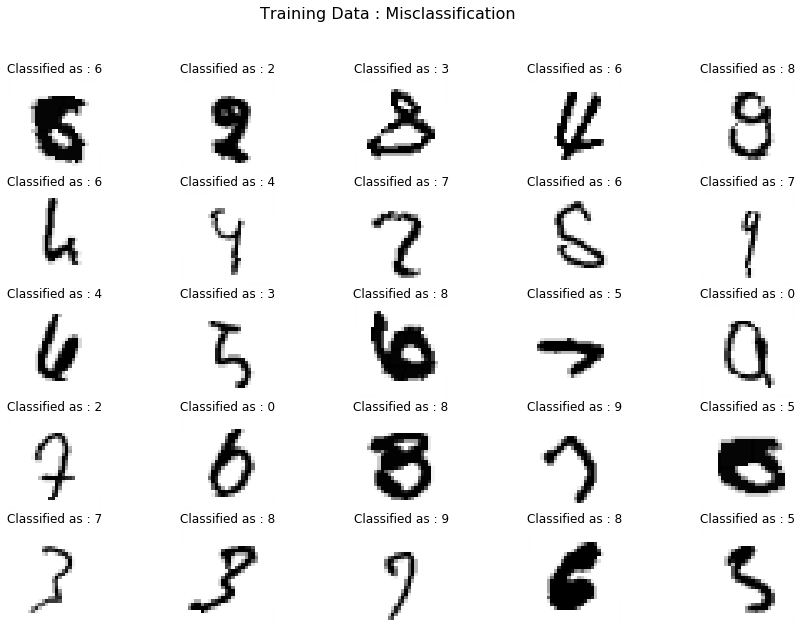

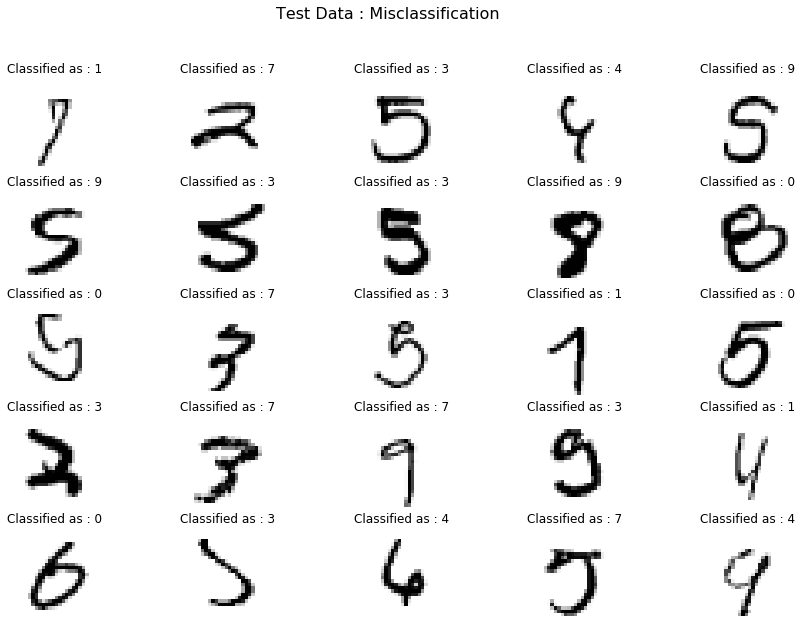

In [15]:
from torch.optim.lr_scheduler import StepLR
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
# scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch,'L1')
    # scheduler.step()
    test(model, device, test_loader,'L1')

Text(0.5, 1.0, 'Test Accuracy')

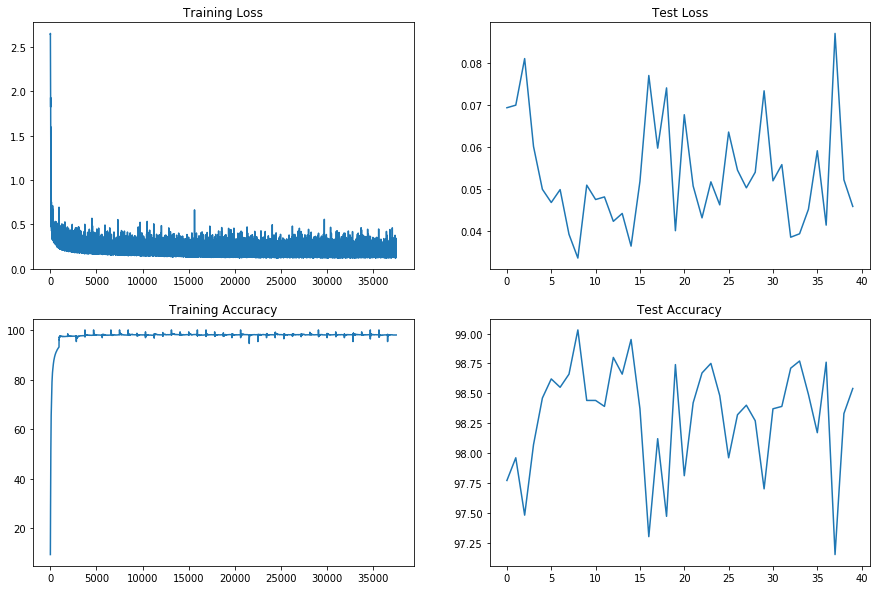

In [16]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_l1)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_l1)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_l1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_l1)
axs[1, 1].set_title("Test Accuracy")

  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
Loss=0.12229347229003906 Batch_id=937 Accuracy=93.37: 100%|██████████| 938/938 [00:19<00:00, 52.03it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0682, Accuracy: 9782/10000 (97.82%)

EPOCH: 1


Loss=0.03761770576238632 Batch_id=937 Accuracy=97.72: 100%|██████████| 938/938 [00:20<00:00, 46.51it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0433, Accuracy: 9856/10000 (98.56%)

EPOCH: 2


Loss=0.01753966510295868 Batch_id=937 Accuracy=98.16: 100%|██████████| 938/938 [00:20<00:00, 46.75it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0436, Accuracy: 9848/10000 (98.48%)

EPOCH: 3


Loss=0.04528424143791199 Batch_id=937 Accuracy=98.38: 100%|██████████| 938/938 [00:19<00:00, 46.93it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9907/10000 (99.07%)

EPOCH: 4


Loss=0.1067078709602356 Batch_id=937 Accuracy=98.52: 100%|██████████| 938/938 [00:20<00:00, 44.88it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0424, Accuracy: 9858/10000 (98.58%)

EPOCH: 5


Loss=0.11236755549907684 Batch_id=937 Accuracy=98.63: 100%|██████████| 938/938 [00:19<00:00, 48.62it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 9903/10000 (99.03%)

EPOCH: 6


Loss=0.003194361925125122 Batch_id=937 Accuracy=98.75: 100%|██████████| 938/938 [00:19<00:00, 47.15it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0291, Accuracy: 9915/10000 (99.15%)

EPOCH: 7


Loss=0.01677270233631134 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [00:20<00:00, 46.87it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 9903/10000 (99.03%)

EPOCH: 8


Loss=0.025892823934555054 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [00:19<00:00, 48.46it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 9922/10000 (99.22%)

EPOCH: 9


Loss=0.014372378587722778 Batch_id=937 Accuracy=98.80: 100%|██████████| 938/938 [00:20<00:00, 46.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0268, Accuracy: 9923/10000 (99.23%)

EPOCH: 10


Loss=0.10621799528598785 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [00:19<00:00, 47.73it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0369, Accuracy: 9885/10000 (98.85%)

EPOCH: 11


Loss=0.05570528656244278 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [00:19<00:00, 47.85it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0281, Accuracy: 9914/10000 (99.14%)

EPOCH: 12


Loss=0.0661328136920929 Batch_id=937 Accuracy=98.90: 100%|██████████| 938/938 [00:20<00:00, 45.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9917/10000 (99.17%)

EPOCH: 13


Loss=0.015974923968315125 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [00:19<00:00, 48.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9918/10000 (99.18%)

EPOCH: 14


Loss=0.029052942991256714 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:19<00:00, 47.99it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9914/10000 (99.14%)

EPOCH: 15


Loss=0.029757589101791382 Batch_id=937 Accuracy=98.88: 100%|██████████| 938/938 [00:19<00:00, 47.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9925/10000 (99.25%)

EPOCH: 16


Loss=0.00821976363658905 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:19<00:00, 48.40it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9933/10000 (99.33%)

EPOCH: 17


Loss=0.010139495134353638 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [00:20<00:00, 46.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 9924/10000 (99.24%)

EPOCH: 18


Loss=0.008196666836738586 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:19<00:00, 47.90it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9936/10000 (99.36%)

EPOCH: 19


Loss=0.01571539044380188 Batch_id=937 Accuracy=98.89: 100%|██████████| 938/938 [00:19<00:00, 48.02it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0239, Accuracy: 9930/10000 (99.30%)

EPOCH: 20


Loss=0.005591690540313721 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [00:20<00:00, 46.85it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 9938/10000 (99.38%)

EPOCH: 21


Loss=0.005593404173851013 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:19<00:00, 47.64it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9937/10000 (99.37%)

EPOCH: 22


Loss=0.006994888186454773 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:19<00:00, 47.21it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9936/10000 (99.36%)

EPOCH: 23


Loss=0.06549619138240814 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [00:20<00:00, 55.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0273, Accuracy: 9911/10000 (99.11%)

EPOCH: 24


Loss=0.02330268919467926 Batch_id=937 Accuracy=98.95: 100%|██████████| 938/938 [00:19<00:00, 47.33it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9938/10000 (99.38%)

EPOCH: 25


Loss=0.008786499500274658 Batch_id=937 Accuracy=98.90: 100%|██████████| 938/938 [00:19<00:00, 53.47it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9924/10000 (99.24%)

EPOCH: 26


Loss=0.005895435810089111 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [00:20<00:00, 46.37it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9920/10000 (99.20%)

EPOCH: 27


Loss=0.016412898898124695 Batch_id=937 Accuracy=98.95: 100%|██████████| 938/938 [00:19<00:00, 47.64it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 9932/10000 (99.32%)

EPOCH: 28


Loss=0.0767785906791687 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:20<00:00, 46.63it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 9903/10000 (99.03%)

EPOCH: 29


Loss=0.0037589818239212036 Batch_id=937 Accuracy=99.01: 100%|██████████| 938/938 [00:19<00:00, 47.92it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0262, Accuracy: 9918/10000 (99.18%)

EPOCH: 30


Loss=0.19680511951446533 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:19<00:00, 48.04it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9934/10000 (99.34%)

EPOCH: 31


Loss=0.08684870600700378 Batch_id=937 Accuracy=98.95: 100%|██████████| 938/938 [00:20<00:00, 45.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0251, Accuracy: 9925/10000 (99.25%)

EPOCH: 32


Loss=0.018510833382606506 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [00:19<00:00, 48.59it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9937/10000 (99.37%)

EPOCH: 33


Loss=0.07969757914543152 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:19<00:00, 47.75it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9941/10000 (99.41%)

EPOCH: 34


Loss=0.018986791372299194 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:20<00:00, 46.48it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9935/10000 (99.35%)

EPOCH: 35


Loss=0.013303607702255249 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:19<00:00, 48.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 9929/10000 (99.29%)

EPOCH: 36


Loss=0.024995341897010803 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:19<00:00, 47.37it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9919/10000 (99.19%)

EPOCH: 37


Loss=0.0032667964696884155 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:19<00:00, 48.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0262, Accuracy: 9911/10000 (99.11%)

EPOCH: 38


Loss=0.04237435758113861 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [00:19<00:00, 47.96it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9937/10000 (99.37%)

EPOCH: 39


Loss=0.01817445456981659 Batch_id=937 Accuracy=98.98: 100%|██████████| 938/938 [00:20<00:00, 45.53it/s]



Test set: Average loss: 0.0233, Accuracy: 9936/10000 (99.36%)



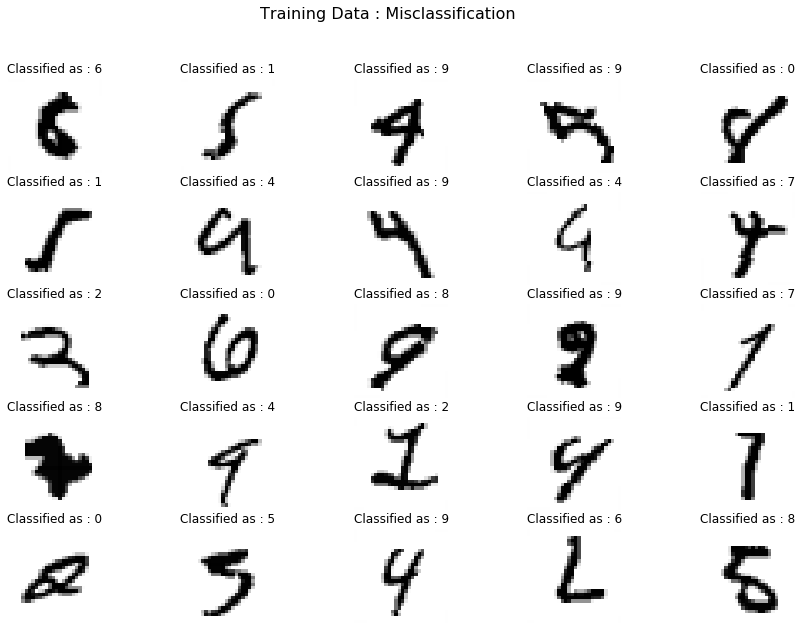

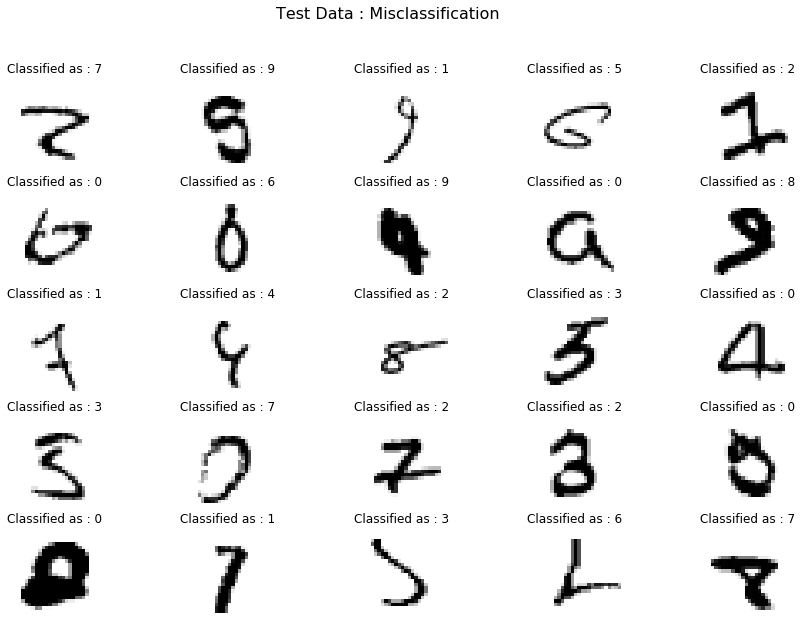

In [17]:
from torch.optim.lr_scheduler import StepLR
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay=0.001)
# scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch,'L2')
    # scheduler.step()
    test(model, device, test_loader,'L2')

Text(0.5, 1.0, 'Test Accuracy')

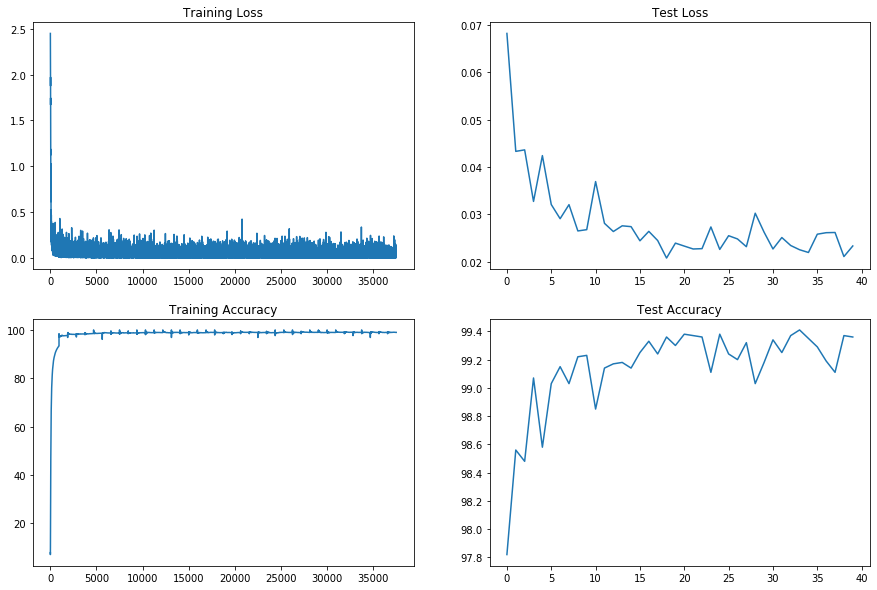

In [18]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_l2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_l2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_l2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_l2)
axs[1, 1].set_title("Test Accuracy")

  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
Loss=0.3109530210494995 Batch_id=937 Accuracy=93.39: 100%|██████████| 938/938 [00:22<00:00, 41.63it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1195, Accuracy: 9622/10000 (96.22%)

EPOCH: 1


Loss=0.2158280611038208 Batch_id=937 Accuracy=97.51: 100%|██████████| 938/938 [00:21<00:00, 42.80it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0504, Accuracy: 9859/10000 (98.59%)

EPOCH: 2


Loss=0.22759364545345306 Batch_id=937 Accuracy=97.65: 100%|██████████| 938/938 [00:21<00:00, 43.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0522, Accuracy: 9857/10000 (98.57%)

EPOCH: 3


Loss=0.3020930290222168 Batch_id=937 Accuracy=97.83: 100%|██████████| 938/938 [00:21<00:00, 43.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0454, Accuracy: 9855/10000 (98.55%)

EPOCH: 4


Loss=0.22081303596496582 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [00:22<00:00, 42.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0473, Accuracy: 9859/10000 (98.59%)

EPOCH: 5


Loss=0.186015784740448 Batch_id=937 Accuracy=97.88: 100%|██████████| 938/938 [00:21<00:00, 43.59it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0638, Accuracy: 9812/10000 (98.12%)

EPOCH: 6


Loss=0.18191909790039062 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [00:21<00:00, 42.68it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0488, Accuracy: 9845/10000 (98.45%)

EPOCH: 7


Loss=0.18152278661727905 Batch_id=937 Accuracy=97.74: 100%|██████████| 938/938 [00:21<00:00, 43.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0898, Accuracy: 9697/10000 (96.97%)

EPOCH: 8


Loss=0.1764407455921173 Batch_id=937 Accuracy=97.84: 100%|██████████| 938/938 [00:21<00:00, 43.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0454, Accuracy: 9870/10000 (98.70%)

EPOCH: 9


Loss=0.14404132962226868 Batch_id=937 Accuracy=97.80: 100%|██████████| 938/938 [00:22<00:00, 42.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0614, Accuracy: 9802/10000 (98.02%)

EPOCH: 10


Loss=0.3985491394996643 Batch_id=937 Accuracy=97.98: 100%|██████████| 938/938 [00:21<00:00, 51.64it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0464, Accuracy: 9858/10000 (98.58%)

EPOCH: 11


Loss=0.2716243863105774 Batch_id=937 Accuracy=97.92: 100%|██████████| 938/938 [00:21<00:00, 42.97it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0589, Accuracy: 9827/10000 (98.27%)

EPOCH: 12


Loss=0.12809544801712036 Batch_id=937 Accuracy=97.88: 100%|██████████| 938/938 [00:21<00:00, 43.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0570, Accuracy: 9854/10000 (98.54%)

EPOCH: 13


Loss=0.18908923864364624 Batch_id=937 Accuracy=97.82: 100%|██████████| 938/938 [00:21<00:00, 43.15it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0484, Accuracy: 9849/10000 (98.49%)

EPOCH: 14


Loss=0.1916486918926239 Batch_id=937 Accuracy=97.92: 100%|██████████| 938/938 [00:21<00:00, 42.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0570, Accuracy: 9826/10000 (98.26%)

EPOCH: 15


Loss=0.20708179473876953 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [00:21<00:00, 44.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0481, Accuracy: 9885/10000 (98.85%)

EPOCH: 16


Loss=0.1311955451965332 Batch_id=937 Accuracy=97.95: 100%|██████████| 938/938 [00:21<00:00, 43.09it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0616, Accuracy: 9831/10000 (98.31%)

EPOCH: 17


Loss=0.16192802786827087 Batch_id=937 Accuracy=97.96: 100%|██████████| 938/938 [00:21<00:00, 50.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0524, Accuracy: 9848/10000 (98.48%)

EPOCH: 18


Loss=0.14067566394805908 Batch_id=937 Accuracy=97.87: 100%|██████████| 938/938 [00:21<00:00, 43.41it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0554, Accuracy: 9842/10000 (98.42%)

EPOCH: 19


Loss=0.1482309103012085 Batch_id=937 Accuracy=97.93: 100%|██████████| 938/938 [00:22<00:00, 42.55it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0572, Accuracy: 9847/10000 (98.47%)

EPOCH: 20


Loss=0.13589854538440704 Batch_id=937 Accuracy=97.89: 100%|██████████| 938/938 [00:21<00:00, 43.32it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0387, Accuracy: 9895/10000 (98.95%)

EPOCH: 21


Loss=0.2745897173881531 Batch_id=937 Accuracy=97.94: 100%|██████████| 938/938 [00:22<00:00, 42.23it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0484, Accuracy: 9871/10000 (98.71%)

EPOCH: 22


Loss=0.1219605877995491 Batch_id=937 Accuracy=97.89: 100%|██████████| 938/938 [00:21<00:00, 43.68it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0481, Accuracy: 9872/10000 (98.72%)

EPOCH: 23


Loss=0.21717271208763123 Batch_id=937 Accuracy=97.96: 100%|██████████| 938/938 [00:21<00:00, 43.50it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0472, Accuracy: 9891/10000 (98.91%)

EPOCH: 24


Loss=0.157226100564003 Batch_id=937 Accuracy=97.91: 100%|██████████| 938/938 [00:21<00:00, 42.94it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0556, Accuracy: 9842/10000 (98.42%)

EPOCH: 25


Loss=0.13317415118217468 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [00:21<00:00, 42.82it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0508, Accuracy: 9863/10000 (98.63%)

EPOCH: 26


Loss=0.1259097158908844 Batch_id=937 Accuracy=98.01: 100%|██████████| 938/938 [00:21<00:00, 43.21it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0547, Accuracy: 9845/10000 (98.45%)

EPOCH: 27


Loss=0.17113517224788666 Batch_id=937 Accuracy=97.99: 100%|██████████| 938/938 [00:21<00:00, 44.02it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0497, Accuracy: 9844/10000 (98.44%)

EPOCH: 28


Loss=0.16407665610313416 Batch_id=937 Accuracy=98.03: 100%|██████████| 938/938 [00:22<00:00, 42.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9890/10000 (98.90%)

EPOCH: 29


Loss=0.19519910216331482 Batch_id=937 Accuracy=97.96: 100%|██████████| 938/938 [00:22<00:00, 41.89it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0504, Accuracy: 9838/10000 (98.38%)

EPOCH: 30


Loss=0.41445159912109375 Batch_id=937 Accuracy=98.00: 100%|██████████| 938/938 [00:22<00:00, 42.52it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0487, Accuracy: 9865/10000 (98.65%)

EPOCH: 31


Loss=0.2342146337032318 Batch_id=937 Accuracy=97.97: 100%|██████████| 938/938 [00:22<00:00, 40.80it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0638, Accuracy: 9804/10000 (98.04%)

EPOCH: 32


Loss=0.19883306324481964 Batch_id=937 Accuracy=98.00: 100%|██████████| 938/938 [00:21<00:00, 42.89it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0582, Accuracy: 9825/10000 (98.25%)

EPOCH: 33


Loss=0.18203049898147583 Batch_id=937 Accuracy=98.03: 100%|██████████| 938/938 [00:22<00:00, 41.94it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0496, Accuracy: 9843/10000 (98.43%)

EPOCH: 34


Loss=0.1683393269777298 Batch_id=937 Accuracy=97.98: 100%|██████████| 938/938 [00:21<00:00, 49.54it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0491, Accuracy: 9860/10000 (98.60%)

EPOCH: 35


Loss=0.17859478294849396 Batch_id=937 Accuracy=97.92: 100%|██████████| 938/938 [00:22<00:00, 42.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0585, Accuracy: 9835/10000 (98.35%)

EPOCH: 36


Loss=0.3308173418045044 Batch_id=937 Accuracy=97.95: 100%|██████████| 938/938 [00:22<00:00, 41.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0717, Accuracy: 9768/10000 (97.68%)

EPOCH: 37


Loss=0.16348567605018616 Batch_id=937 Accuracy=97.98: 100%|██████████| 938/938 [00:22<00:00, 40.85it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0472, Accuracy: 9847/10000 (98.47%)

EPOCH: 38


Loss=0.12006915360689163 Batch_id=937 Accuracy=97.91: 100%|██████████| 938/938 [00:22<00:00, 41.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0504, Accuracy: 9853/10000 (98.53%)

EPOCH: 39


Loss=0.23224806785583496 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:22<00:00, 41.80it/s]



Test set: Average loss: 0.0567, Accuracy: 9837/10000 (98.37%)



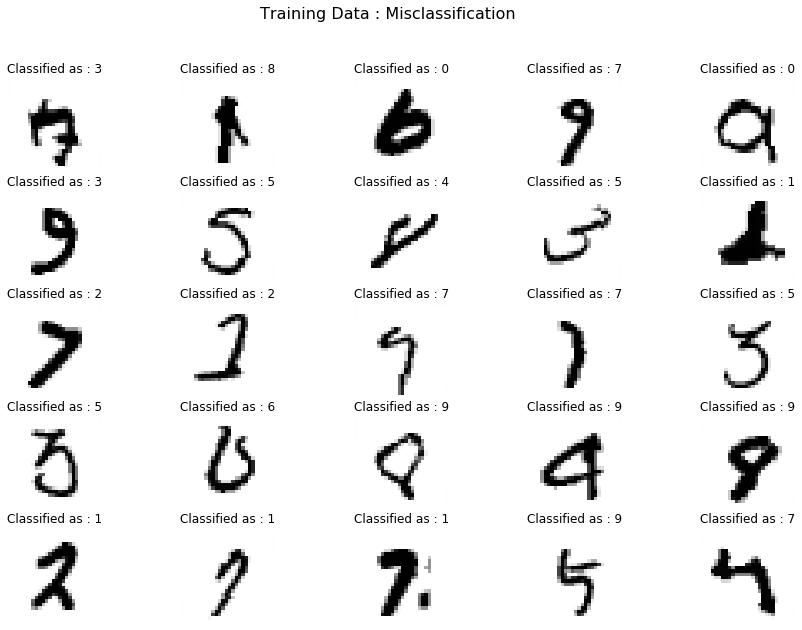

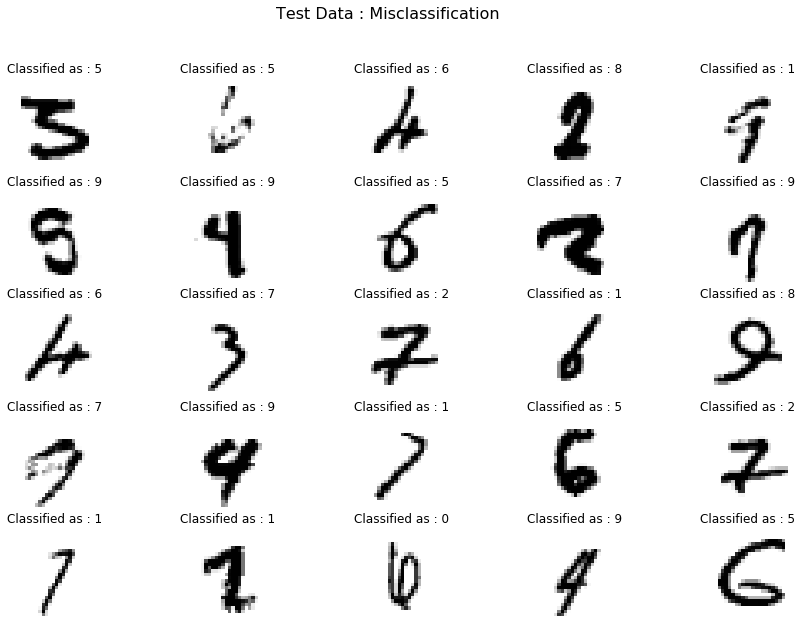

In [19]:
from torch.optim.lr_scheduler import StepLR
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay=0.001)
# scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch,'ElastiNet')
    # scheduler.step()
    test(model, device, test_loader,'ElastiNet')

Text(0.5, 1.0, 'Test Accuracy')

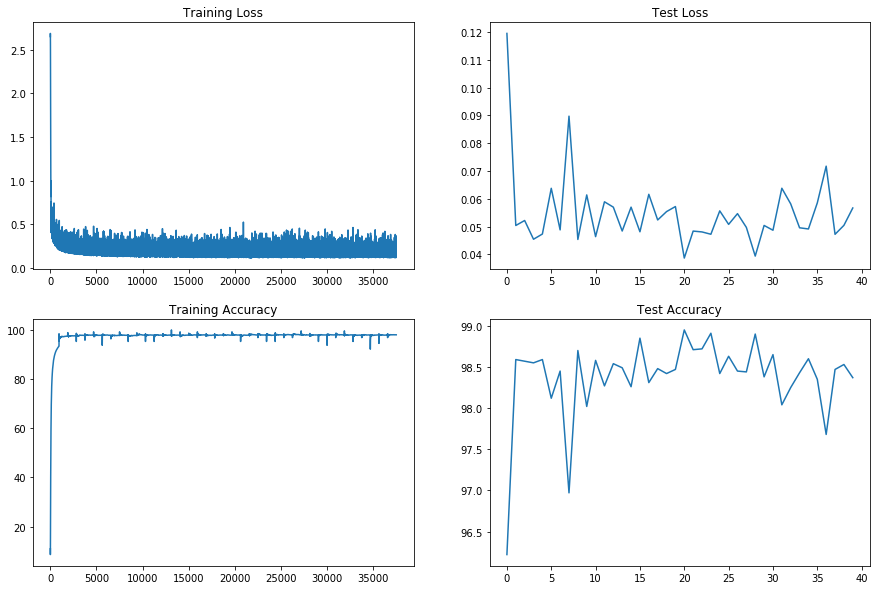

In [20]:

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_l1_l2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_l1_l2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_l1_l2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_l1_l2)
axs[1, 1].set_title("Test Accuracy")

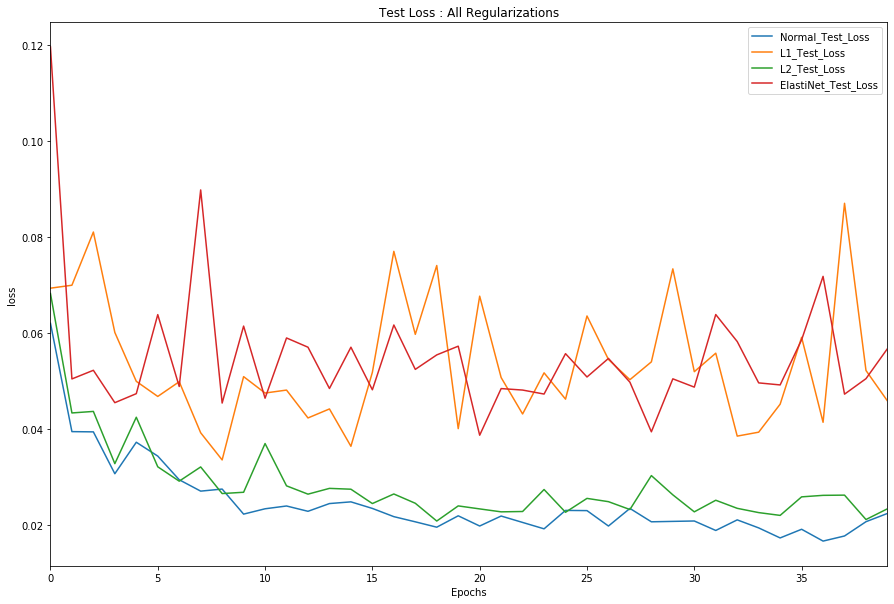

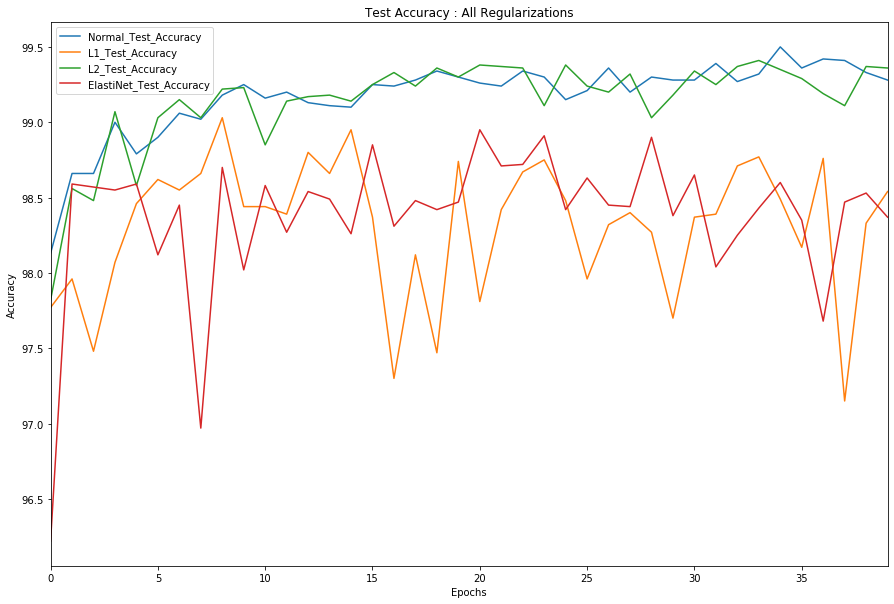

In [22]:
import pandas as pd
Testing_all_loss = pd.DataFrame({'Normal_Test_Loss' : test_losses,
                                 'L1_Test_Loss' : test_losses_l1,
                                 'L2_Test_Loss' : test_losses_l2,
                                 'ElastiNet_Test_Loss' : test_losses_l1_l2
                                 })

Testing_all_accuracy = pd.DataFrame({'Normal_Test_Accuracy' : test_acc,
                                     'L1_Test_Accuracy' : test_acc_l1,
                                     'L2_Test_Accuracy' : test_acc_l2,
                                     'ElastiNet_Test_Accuracy' : test_acc_l1_l2
                                     })

fig1 = Testing_all_loss.plot(figsize=(15,10),kind = 'line', title = "Test Loss : All Regularizations")
fig1.set_xlabel("Epochs")
fig1.set_ylabel("loss")
fig2 = Testing_all_accuracy.plot(figsize=(15,10),kind = 'line',title = "Test Accuracy : All Regularizations")
fig2.set_xlabel("Epochs")
fig2.set_ylabel("Accuracy")

fig1
fig2

L1 Vs L2 :

L1 offers feature selection and this is particulalrly efficient if coupled with early stopping criterion, could perform a bit better.  
L2 is definitely the winner as it does not eliminate any features, just minimises their importance.  

L1 accuracy looks highly unstable.  
L2 accuracy is pretty stable and keeps increasing.  

Perhaps this is the reason why pytorch gives L2 as defult.  